In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sports-supplements/Sports Supplements.csv


In [2]:
import pandas as pd

# Load the CSV file
data_path = os.path.join('/kaggle/input/sports-supplements/Sports Supplements.csv')
data = pd.read_csv(data_path)

# Display the first few rows of the dataset
data.head()


,supplement,alt name,"evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong",Claimed improved aspect of fitness,fitness category,sport or exercise type tested,OTW,popularity,number of studies examined,number of citations,...,Link to individual study.11,Link to individual study.12,Link to individual study.13,Link to individual study.14,Link to individual study.15,Link to individual study.16,Link to individual study.17,Link to individual study.18,Link to individual study.19,Link to individual study.20
0,AAKG,L-arginine alpha-ketoglutarate,1.0,peak power output,strength–power,weight training,OTW,242,1,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAKG,L-arginine alpha-ketoglutarate,0.0,"body composition, aerobic capacity, muscle end...","fat burning–muscle building, aerobic–endurance",weight training,NaN,242,1,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baking soda,"Bicarbonate of soda, sodium bicarbonate, NaHCO3",5.0,high-intensity performance,anaerobic–high-intensity,"rowing, cycling, swimming, running, other",NaN,947,14,140,...,http://onlinelibrary.wiley.com/o/cochrane/clce...,http://onlinelibrary.wiley.com/o/cochrane/clce...,http://onlinelibrary.wiley.com/o/cochrane/clce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BCAAs,"branched-chain amino acids, leucine, isoleucin...",4.0,fatigue resistance,aerobic–endurance,"cycling, circuit training",NaN,5490,3,660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BCAAs,"branched-chain amino acids, leucine, isoleucin...",3.0,"aerobic performance, endurance, power","aerobic–endurance, strength–power","cycling, other",NaN,5490,4,660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filter the data for supplements with strong evidence (score 5 and 6)
strong_evidence_data = data[data['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '] >= 5]

# Display the supplements with strong evidence and their claimed benefits
strong_evidence_data[['supplement', 'Claimed improved aspect of fitness', 'fitness category']]


,supplement,Claimed improved aspect of fitness,fitness category
2,Baking soda,high-intensity performance,anaerobic–high-intensity
7,BCAAs,muscle damage + soreness,recovery–injury prevention
20,Caffeine,endurance performance,aerobic–endurance
23,Caffeine,mood during exercise,sports psychology
26,Casein,"muscle building, endurance, strength","fat burning–muscle building, strength–power, a..."
35,Creatine,"strength, power, neuromuscular function",strength–power
36,Creatine,muscle mass,fat burning–muscle building
68,L-carnitine LT,muscle damage,recovery–injury prevention
95,Whey protein,"strength, muscle building + recovery","strength–power, recovery–injury prevention"


**Baking soda:**

* Claimed Benefit: Improves high-intensity performance.
* Fitness Category: Anaerobic–High-Intensity.

**BCAAs (Branched-Chain Amino Acids):**

* Claimed Benefit: Reduces muscle damage and soreness.
* Fitness Category: Recovery–Injury Prevention.

**Caffeine:**

* Claimed Benefit: Enhances endurance performance.
* Fitness Category: Aerobic–Endurance.
* Additional Benefit: Improves mood during exercise.
* Additional Category: Sports Psychology.

**Casein:**

* Claimed Benefit: Aids in muscle building, endurance, and strength.
* Fitness Category: Fat Burning–Muscle Building, Strength–Power, Aerobic–Endurance.

**Creatine:**

* Claimed Benefit: Boosts strength, power, and neuromuscular function.
* Fitness Category: Strength–Power.
* Additional Benefit: Increases muscle mass.
* Additional Category: Fat Burning–Muscle Building.

**L-carnitine LT:**

* Claimed Benefit: Reduces muscle damage.
* Fitness Category: Recovery–Injury Prevention.

**Whey protein:**

* Claimed Benefit: Enhances strength, muscle building, and recovery.
* Fitness Category: Strength–Power, Recovery–Injury Prevention

In [4]:
# Filter the data for supplements with promising evidence (score 4)
promising_evidence_data = data[data['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '] == 4]

# Display the supplements with promising evidence and their claimed benefits
promising_evidence_data[['supplement', 'Claimed improved aspect of fitness', 'fitness category']]


,supplement,Claimed improved aspect of fitness,fitness category
3,BCAAs,fatigue resistance,aerobic–endurance
8,Beetroot juice,aerobic efficiency,aerobic–endurance
19,Caffeine,intense aerobic performance,aerobic–endurance
22,Caffeine,performance when sleep-deprived,sports psychology
29,CLA,body composition,fat burning–muscle building


**BCAAs (Branched-Chain Amino Acids):**

* Claimed Benefit: Enhances fatigue resistance.
* Fitness Category: Aerobic–Endurance.

**Beetroot juice:**

* Claimed Benefit: Improves aerobic efficiency.
* Fitness Category: Aerobic–Endurance.

**Caffeine:**

* Claimed Benefit: Enhances intense aerobic performance.
* Fitness Category: Aerobic–Endurance.
* Additional Benefit: Enhances performance when sleep-deprived.
* Additional Category: Sports Psychology.

**CLA (Conjugated Linoleic Acid):**

* Claimed Benefit: Improves body composition.
* Fitness Category: Fat Burning–Muscle Building.

In [5]:
# Filter the data for supplements with conflicting evidence (score 3)
conflicting_evidence_data = data[data['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '] == 3]

# Display the supplements with conflicting evidence and their claimed benefits
conflicting_evidence_data[['supplement', 'Claimed improved aspect of fitness', 'fitness category']]


,supplement,Claimed improved aspect of fitness,fitness category
4,BCAAs,"aerobic performance, endurance, power","aerobic–endurance, strength–power"
21,Caffeine,"skill, agility + speed",sports psychology
24,Caffeine,high-intensity performance,anaerobic–high-intensity
33,Creatine,high-intensity performance,anaerobic–high-intensity
41,Fish oil,cardio fitness markers,general fitness
51,Green tea extract,"fat burning, oxidative stress reduction","fat burning–muscle building, recovery–injury p..."
52,HCA,fat burning,fat burning–muscle building
54,HMB,strength,strength–power
64,L-arginine,general exercise performance,general fitness
94,Whey protein,weight + fat loss,fat burning–muscle building


In [6]:
# Filter the data for supplements with little to no evidence (scores 0, 1, 2)
little_evidence_data = data[data['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '].isin([0, 1, 2])]

# Display the supplements with little to no evidence and their claimed benefits
little_evidence_data[['supplement', 'Claimed improved aspect of fitness', 'fitness category']]


,supplement,Claimed improved aspect of fitness,fitness category
0,AAKG,peak power output,strength–power
1,AAKG,"body composition, aerobic capacity, muscle end...","fat burning–muscle building, aerobic–endurance"
5,BCAAs,immune defences in athletes,general fitness
6,BCAAs,body composition,fat burning–muscle building
9,Beta alanine,high-intensity performance,"aerobic–endurance, anaerobic–high-intensity"
...,...,...,...
88,Spirulina,endurance performance,aerobic–endurance
89,Spirulina,"muscle damage, fat burning","recovery–injury prevention, fat burning–muscle..."
91,Tribulus terrestris,"strength, body composition, testosterone","strength–power, fat burning-muscle building"
92,Tyrosine,exercise tolerance in hot conditions,"aerobic–endurance, sports psychology"


In [7]:
# Sort the data by popularity in descending order and pick the top 10
top_popular_supplements = data.sort_values(by='popularity', ascending=False).head(10)

# Display the top 10 most popular supplements with their claimed benefits and evidence level
top_popular_supplements[['supplement', 'Claimed improved aspect of fitness', 'evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong ']]


,supplement,Claimed improved aspect of fitness,"evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong"
86,Soy protein,high intensity endurance,1.0
87,Soy protein,calorie + fat burning in postmenopausal women,1.0
68,L-carnitine LT,muscle damage,5.0
67,L-carnitine LT,endurance,0.0
66,L-carnitine LT,metabolism,1.0
41,Fish oil,cardio fitness markers,3.0
40,Fish oil,metabolism,0.0
44,Fish oil,inflammation + muscle soreness,2.0
43,Fish oil,body fat,1.0
42,Fish oil,endurance,0.0


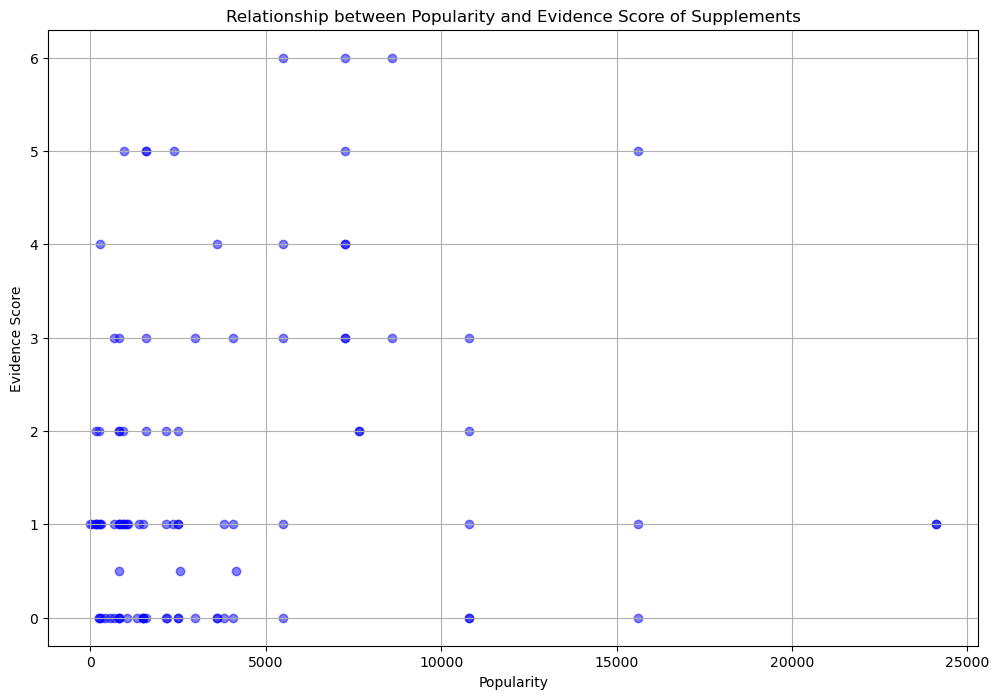

In [8]:
import matplotlib.pyplot as plt

# Scatter plot for popularity vs evidence score
plt.figure(figsize=(12, 8))
plt.scatter(data['popularity'], data['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '], alpha=0.5, color='blue')
plt.title('Relationship between Popularity and Evidence Score of Supplements')
plt.xlabel('Popularity')
plt.ylabel('Evidence Score')
plt.grid(True)
plt.show()


In [9]:
# Group data by sport/exercise type and calculate the average evidence score for each type
sports_evidence = data.groupby('sport or exercise type tested')['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '].mean().sort_values(ascending=False)

# Display the top sport/exercise types based on average evidence score
top_sports_evidence = sports_evidence.head(10)
top_sports_evidence


sport or exercise type tested
weight training, circuit training, cycling, swimming    6.00
weight training, rowing                                 5.00
cycling, running                                        5.00
rowing, cycling, swimming, running, other               5.00
cycling, rowing                                         4.00
cycling, circuit training                               4.00
cycling, weight training                                3.50
weight training, running                                3.25
weight training, cycling, running                       3.00
running, cycling, circuit training, rowing, other       3.00
Name: evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong , dtype: float64

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


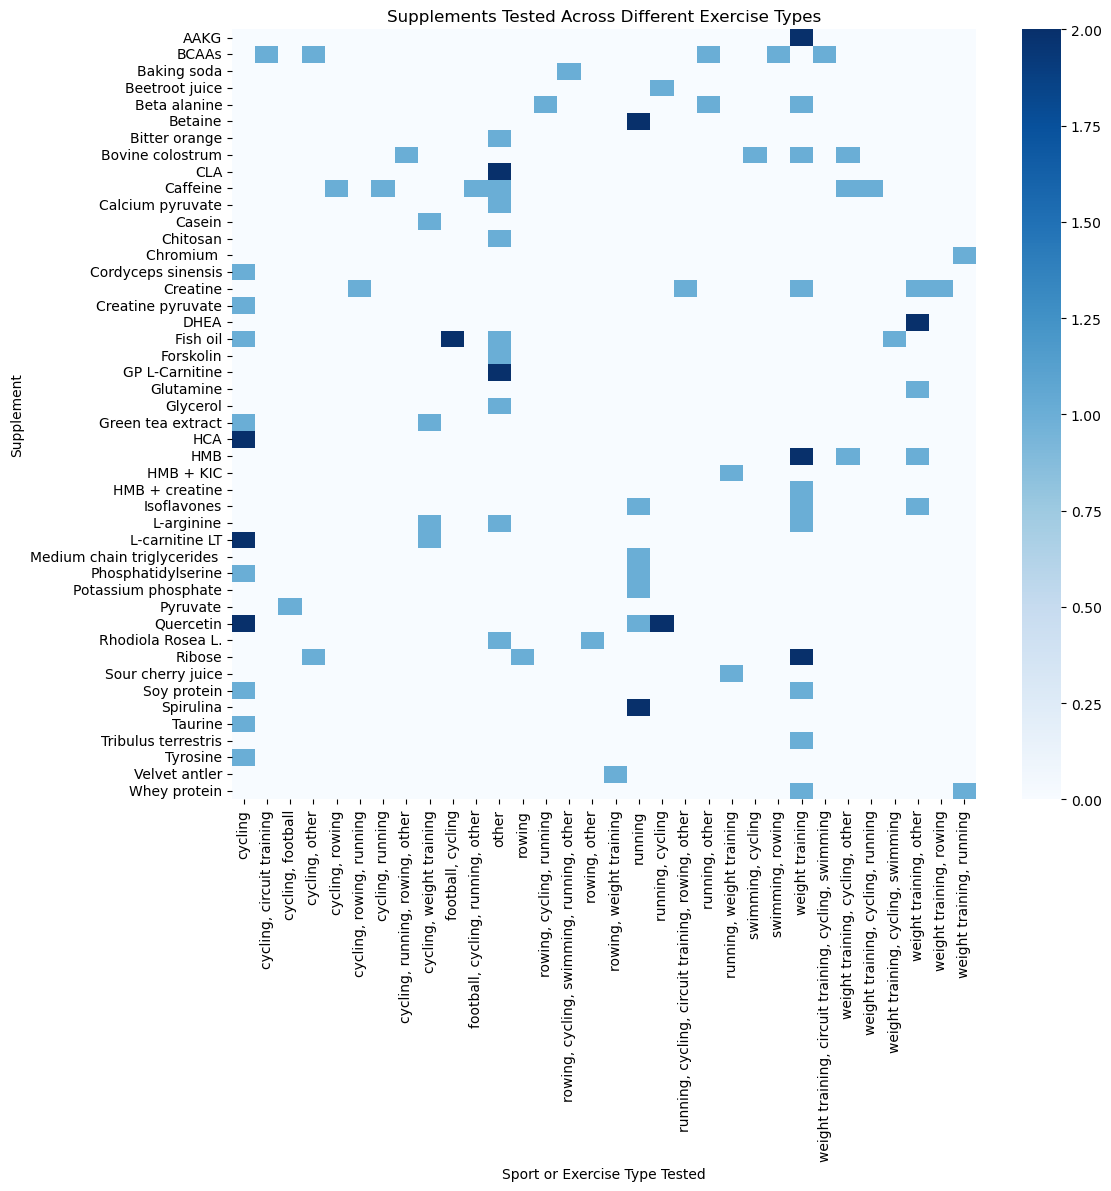

In [10]:
import seaborn as sns

# Create a subset of the data for the heatmap
heatmap_data = data[['supplement', 'sport or exercise type tested']].copy()

# Pivot the data to create a matrix of supplements and exercise types
heatmap_matrix = heatmap_data.pivot_table(index='supplement', columns='sport or exercise type tested', aggfunc=len, fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_matrix, cmap='Blues')
plt.title('Supplements Tested Across Different Exercise Types')
plt.xlabel('Sport or Exercise Type Tested')
plt.ylabel('Supplement')
plt.show()


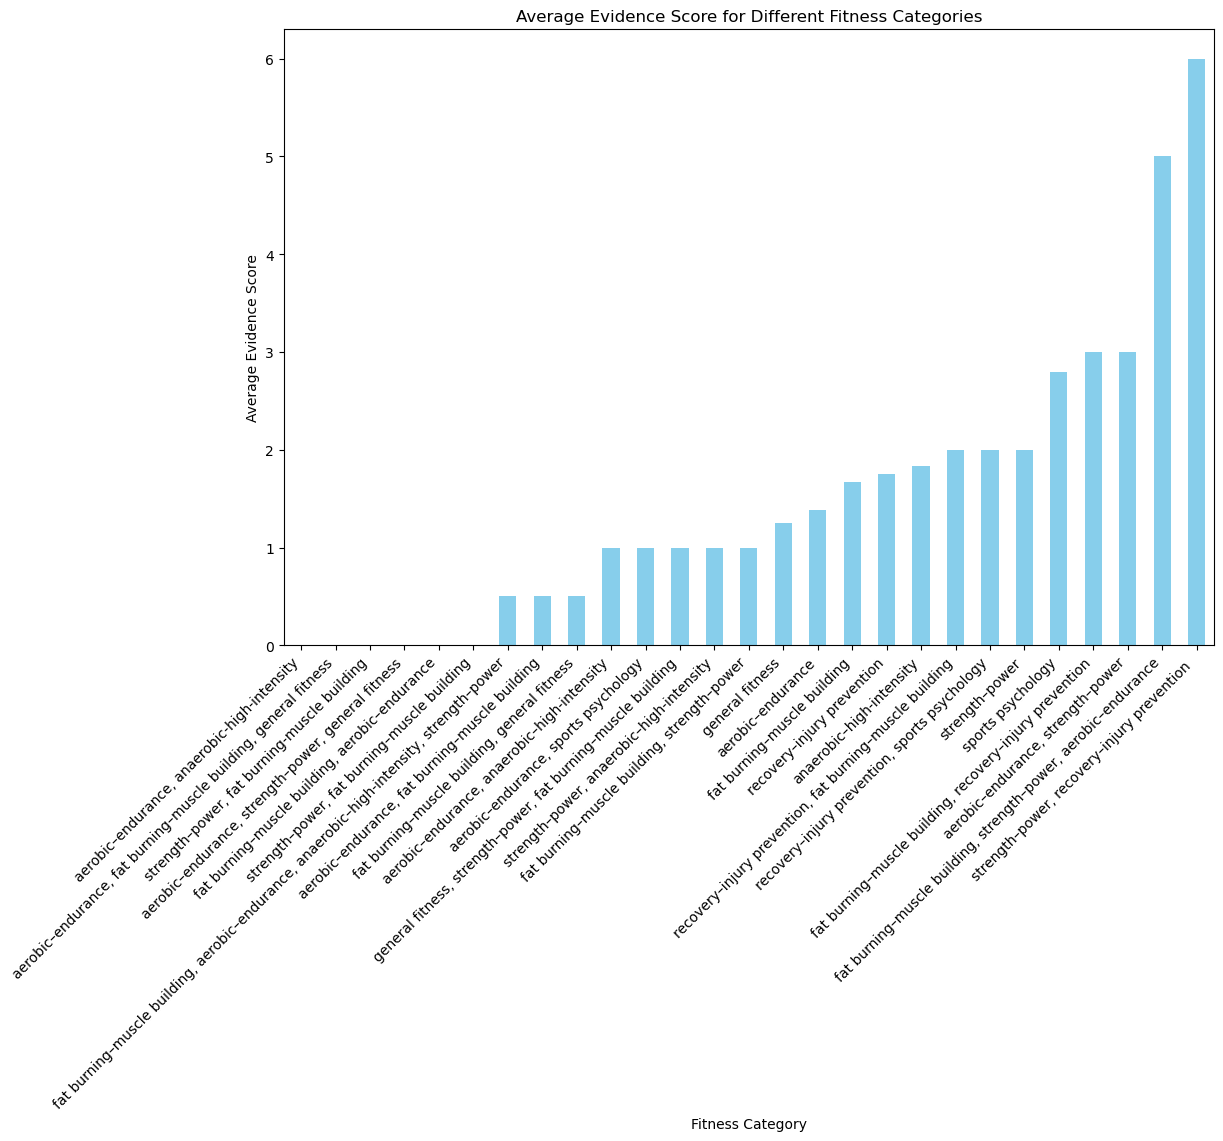

In [11]:
# Group data by fitness category and calculate the average evidence score for each category
fitness_category_evidence = data.groupby('fitness category')['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '].mean()

# Create a bar chart
plt.figure(figsize=(12, 8))
fitness_category_evidence.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Evidence Score for Different Fitness Categories')
plt.xlabel('Fitness Category')
plt.ylabel('Average Evidence Score')
plt.xticks(rotation=45, ha='right')
plt.show()


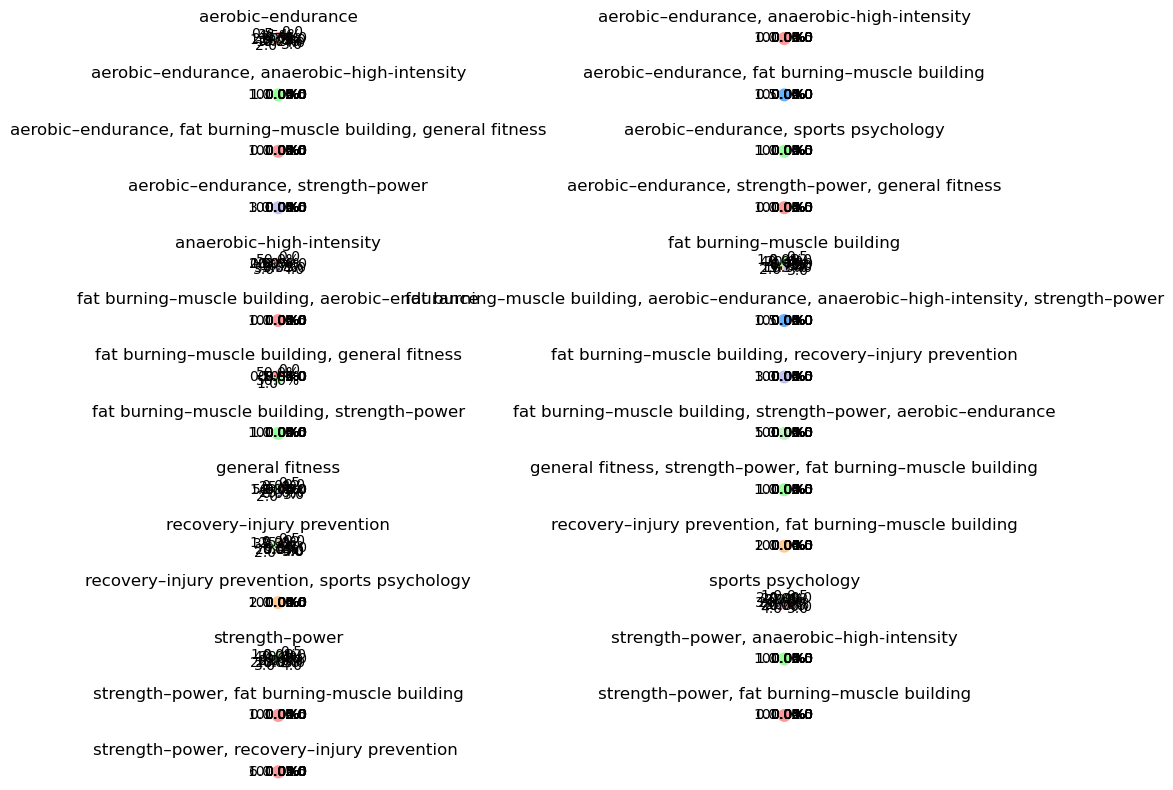

In [12]:
# Group data by fitness category and evidence score, then calculate the count for each combination
fitness_category_evidence_count = data.groupby(['fitness category', 'evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong ']).size().unstack(fill_value=0)

# Define colors for different evidence scores
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Calculate the number of required rows and columns for subplots
num_rows = (len(fitness_category_evidence_count) + 1) // 2
num_cols = min(len(fitness_category_evidence_count), 2)

# Create a pie chart for each fitness category
plt.figure(figsize=(12, 8))
for i, category in enumerate(fitness_category_evidence_count.index):
    plt.subplot(num_rows, num_cols, i+1)
    plt.pie(fitness_category_evidence_count.loc[category], labels=fitness_category_evidence_count.columns, autopct='%1.1f%%', colors=colors)
    plt.title(category)
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


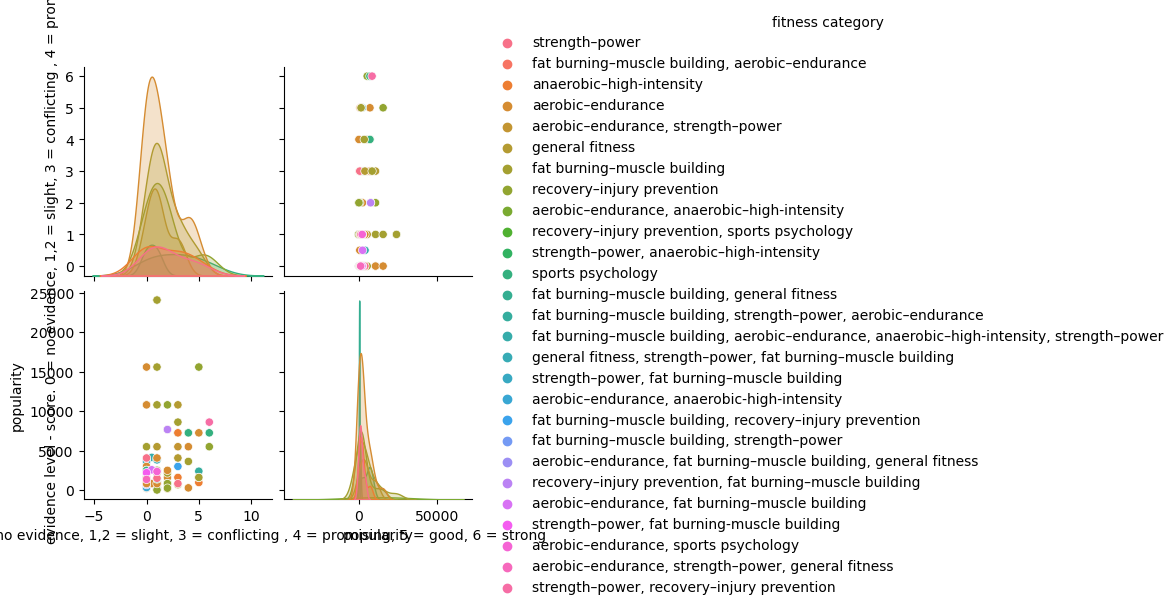

In [13]:
import seaborn as sns

# Select relevant columns for the scatter plot matrix
selected_columns = ['supplement', 'fitness category', 'sport or exercise type tested', 'evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong ', 'popularity']

# Create a pairplot (scatter plot matrix)
sns.pairplot(data[selected_columns], hue='fitness category', diag_kind='kde')
plt.show()


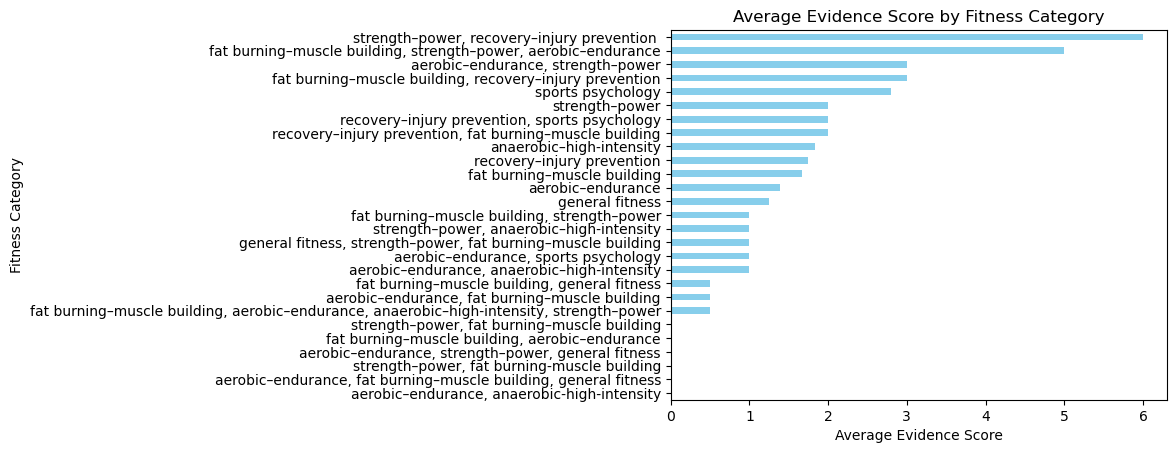

In [14]:
# Group data by fitness category and evidence score, then calculate the average evidence score for each category
fitness_category_evidence = data.groupby('fitness category')['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '].mean()

# Create a bar chart
fitness_category_evidence.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Evidence Score by Fitness Category')
plt.xlabel('Average Evidence Score')
plt.ylabel('Fitness Category')
plt.show()


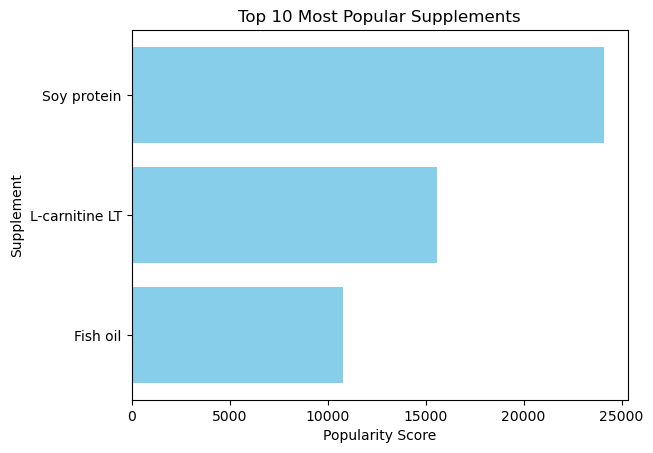

In [15]:
# Sort data by popularity and select the top 10 supplements
top_popular_supplements = data.sort_values(by='popularity', ascending=False).head(10)

# Create a bar chart
plt.barh(top_popular_supplements['supplement'], top_popular_supplements['popularity'], color='skyblue')
plt.title('Top 10 Most Popular Supplements')
plt.xlabel('Popularity Score')
plt.ylabel('Supplement')
plt.gca().invert_yaxis()  # Invert y-axis to show highest popularity at the top
plt.show()


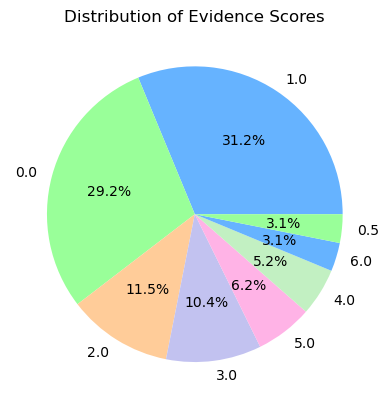

In [16]:
# Count the occurrences of each evidence score
evidence_counts = data['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '].value_counts()

# Define colors for the pie chart
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Create a pie chart
plt.pie(evidence_counts, labels=evidence_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Evidence Scores')
plt.show()


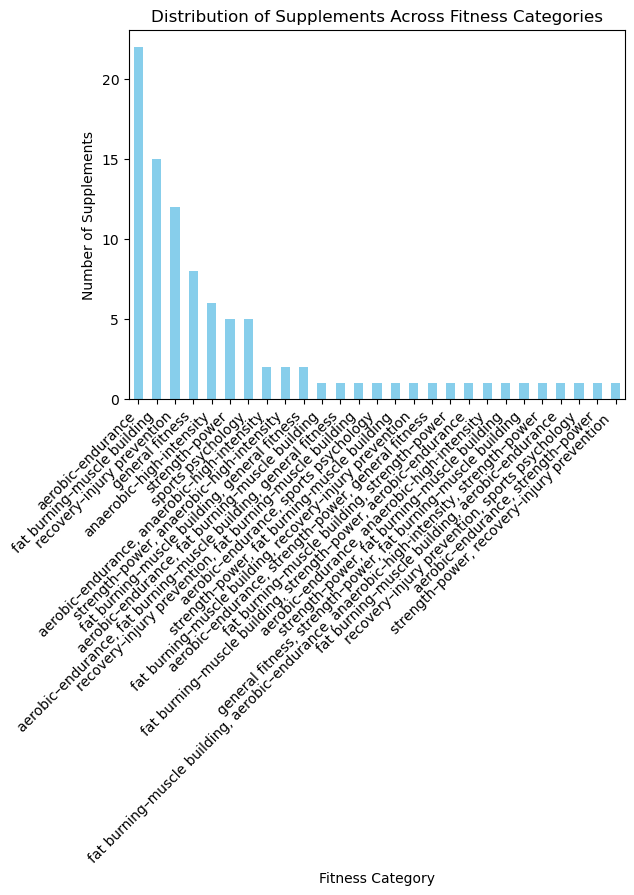

In [17]:
# Count the occurrences of each fitness category
fitness_category_counts = data['fitness category'].value_counts()

# Create a bar chart
fitness_category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Supplements Across Fitness Categories')
plt.xlabel('Fitness Category')
plt.ylabel('Number of Supplements')
plt.xticks(rotation=45, ha='right')
plt.show()


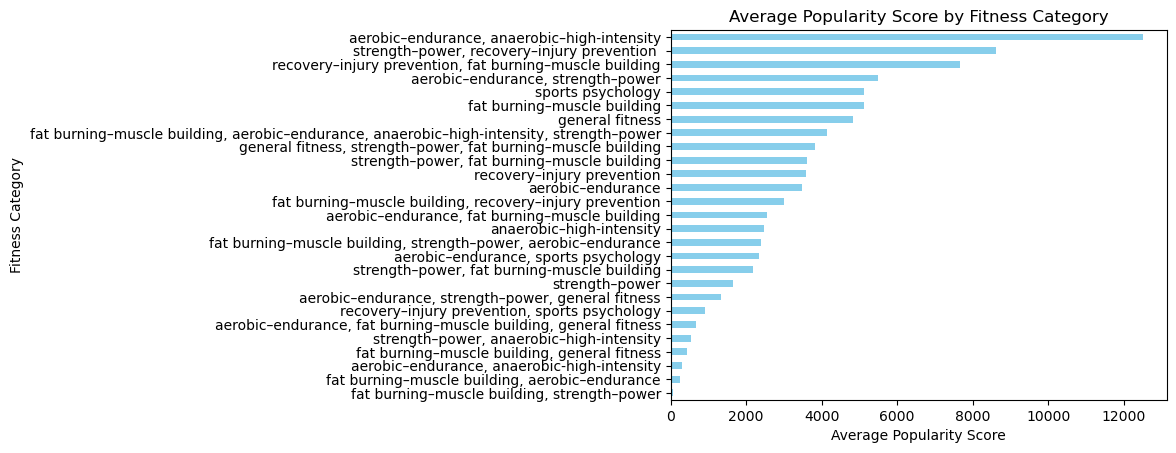

In [18]:
# Group data by fitness category and calculate the average popularity score for each category
fitness_category_popularity = data.groupby('fitness category')['popularity'].mean()

# Create a bar chart
fitness_category_popularity.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Popularity Score by Fitness Category')
plt.xlabel('Average Popularity Score')
plt.ylabel('Fitness Category')
plt.show()


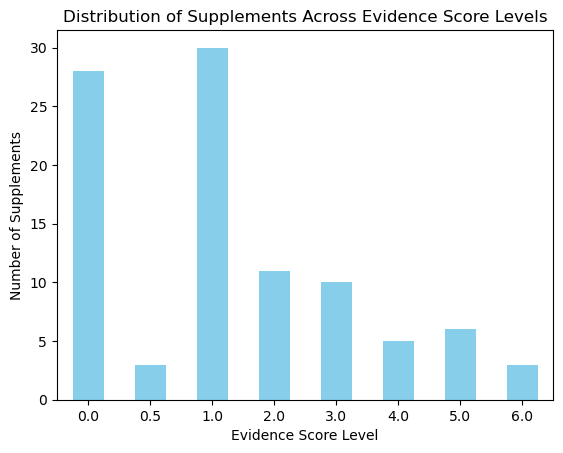

In [19]:
# Count the occurrences of each evidence score level
evidence_score_counts = data['evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong '].value_counts()

# Create a bar chart
evidence_score_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Supplements Across Evidence Score Levels')
plt.xlabel('Evidence Score Level')
plt.ylabel('Number of Supplements')
plt.xticks(rotation=0)
plt.show()


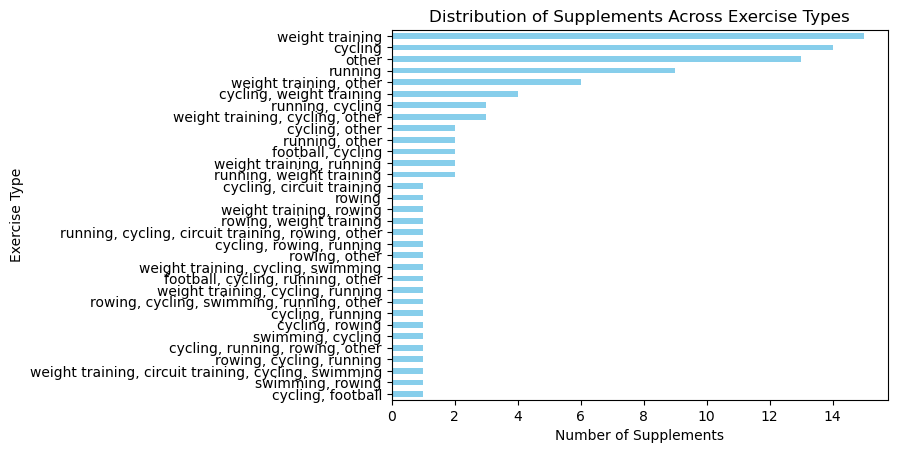

In [20]:
# Count the occurrences of each sport or exercise type
exercise_type_counts = data['sport or exercise type tested'].value_counts()

# Create a bar chart
exercise_type_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribution of Supplements Across Exercise Types')
plt.xlabel('Number of Supplements')
plt.ylabel('Exercise Type')
plt.show()
